In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score 
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\Siddharth Bingi\\Documents\\Sabir ML\\Assignment 1\\sgemm_product_dataset\\sgemm_product.csv")

In [3]:
df["avg_run"] = df.iloc[:,14:].mean(axis = 1)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625


In [4]:
median_run = df['avg_run'].median()
df.loc[df['avg_run'] >= median_run, 'run_class'] = 1
df.loc[df['avg_run'] < median_run, 'run_class'] = 0

In [5]:
df.drop(['Run1 (ms)', 'Run2 (ms)','Run3 (ms)', 'Run4 (ms)', 'avg_run'], axis = 1, inplace = True)
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,run_class
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,1.0
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,1.0
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,1.0
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,1.0
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,1.0


In [18]:
# defining feature matrix(X) and response vector(y) 
X = df.iloc[:, 0:14]
y = df["run_class"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=10) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one_column, X_test), axis = 1)
y_test = np.array(y_test).reshape((y_test.shape[0],1))

In [7]:
def sigmoid(X,theta):
    z = np.exp(X @ theta.T)
    y_hat = (z/(1+z))
    return y_hat

In [8]:
def costFunction(y, y_hat):
    cost = (-1/len(y))*np.sum((y * np.log(y_hat)) + ((1 - y) * np.log(1 - y_hat)),axis=0)
    return cost

In [16]:
# gradient descent algorithm
def gradientDescent(X,y,theta,iterations,alpha, check_tol, tolerance=10**-3):
    cost_train = []
    cost_test = []
    
    for i in range(iterations):
        theta = theta - (alpha/len(X_train)) * np.sum(X * (sigmoid(X,theta) - y), axis=0)
        #cost[i] = costFunction(y, sigmoid(X,theta))
        cost = costFunction(y, sigmoid(X,theta))
        cost_train.append(cost)
        
        cost = costFunction(y_test, sigmoid(X_test,theta))
        cost_test.append(cost)
        
        if check_tol:
            if (i>0) and(abs((cost_train[i]-cost_train[i-1])/cost_train[i-1]) < tolerance).any():
                print("Gradient Descent algorithm converged after", i+1, "Iterations")
                break
            
    
    return theta,cost_train, cost_test

In [10]:
def logistic_regression(X, y, alpha, iterations, check_tol=False, tolerance=10**-3):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros((1,n+1))
    y = np.array(y).reshape((y.shape[0],1))
    theta, cost_train, cost_test = gradientDescent(X,y,theta,iterations,alpha,check_tol,tolerance)
    
    return theta,cost_train, cost_test

In [21]:
a,b,c = logistic_regression(X_train, y_train, 0.01, 10)

In [27]:
def test(X_test,theta):
    return sigmoid(X_test, theta)

In [29]:
y_predicted = test(X_test, final_theta[0])

log_df = pd.DataFrame(y_test, columns=['y_actual']) 
log_df = pd.concat([log_df, pd.DataFrame(y_predicted)], axis=1, ignore_index=True)
log_df.columns = ['y_actual', 'y_hat']

theshold_val = 0.5
log_df.loc[log_df['y_hat'] >= theshold_val, 'y_pred'] = 1
log_df.loc[log_df['y_hat'] < theshold_val, 'y_pred'] = 0

In [34]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(log_df['y_actual'], log_df['y_pred']) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(log_df['y_actual'], log_df['y_pred']) )
print ('Report : ')
print (classification_report(log_df['y_actual'], log_df['y_pred']) )


Confusion Matrix :
[[28581  7528]
 [ 8578 27793]]
Accuracy Score : 0.7777869757174393
Report : 
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78     36109
         1.0       0.79      0.76      0.78     36371

    accuracy                           0.78     72480
   macro avg       0.78      0.78      0.78     72480
weighted avg       0.78      0.78      0.78     72480



In [36]:
alpha_values = [0.0001, 0.001, 0.01, 0.1]

alpha_train_theta = []
alpha_train_cost = []

alpha_test_cost = []


for i in range(len(alpha_values)):
    print("\n######---- Iteration with alpha value", alpha_values[i],"-----#####")
    
    theta, trainCost, testCost = logistic_regression(X_train, y_train, alpha_values[i], 10000, False)
    
    alpha_train_theta.append(theta)
    alpha_train_cost.append(trainCost)
    
    alpha_test_cost.append(testCost)


######---- Iteration with alpha value 0.0001 -----#####

######---- Iteration with alpha value 0.001 -----#####

######---- Iteration with alpha value 0.01 -----#####

######---- Iteration with alpha value 0.1 -----#####


In [45]:
alpha_train_cost[0][-1]

array([0.62672614])

In [44]:
alpha_test_cost[0][-1]

array([0.62644138])

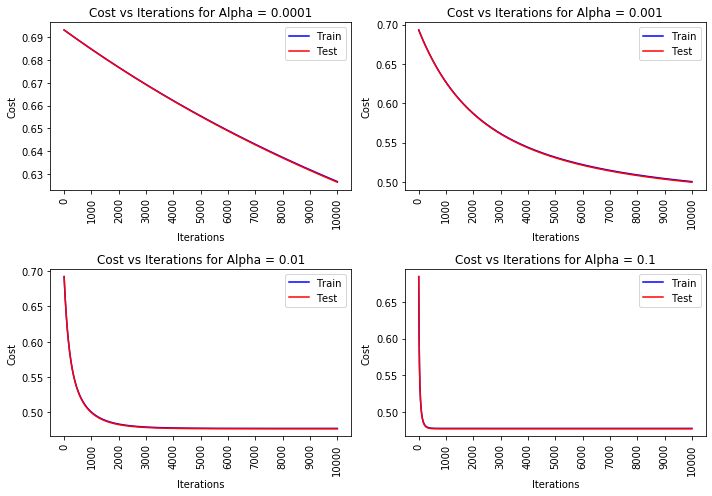

In [37]:
##### Plot for Cost vs Iterations for Each Alpha

fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)

ax1.plot(range(len(alpha_train_cost[0])),alpha_train_cost[0],'-b', label="Train")
ax1.plot(range(len(alpha_test_cost[0])),alpha_test_cost[0],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.0001")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
ax1.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)

ax1 = fig.add_subplot(2,2,2)

ax1.plot(range(len(alpha_train_cost[1])),alpha_train_cost[1],'-b', label="Train")
ax1.plot(range(len(alpha_test_cost[1])),alpha_test_cost[1],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.001")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
ax1.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)


ax1 = fig.add_subplot(2,2,3)

ax1.plot(range(len(alpha_train_cost[2])),alpha_train_cost[2],'-b', label="Train")
ax1.plot(range(len(alpha_test_cost[2])),alpha_test_cost[2],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.01")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
ax1.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)

ax1 = fig.add_subplot(2,2,4)

ax1.plot(range(len(alpha_train_cost[3])),alpha_train_cost[3],'-b', label="Train")
ax1.plot(range(len(alpha_test_cost[3])),alpha_test_cost[3],'-r', label="Test")
ax1.legend(loc="upper right")
ax1.set_title("Cost vs Iterations for Alpha = 0.1")
ax1.set_ylabel("Cost")
ax1.set_xlabel("Iterations")
ax1.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

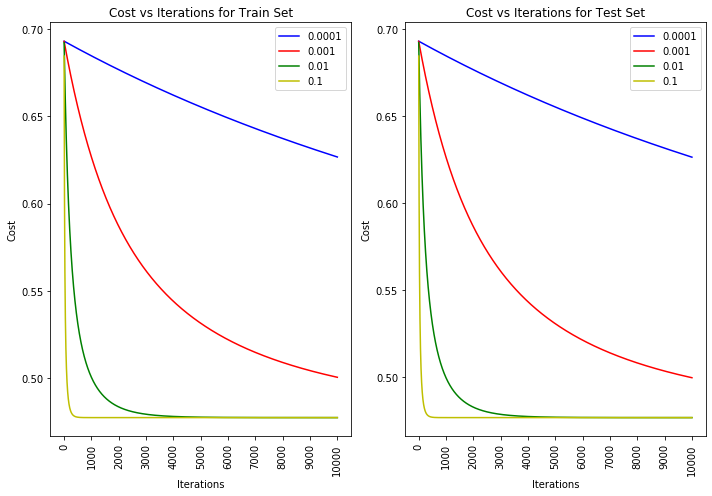

In [48]:
#### Plots for Cost vs Iterations for Train and Test separately

fig = plt.figure(figsize=(10,7))

ax2 = fig.add_subplot(1,2,1)

ax2.plot(range(len(alpha_train_cost[0])),alpha_train_cost[0],'-b', label="0.0001")
ax2.plot(range(len(alpha_train_cost[1])),alpha_train_cost[1],'-r', label="0.001")
ax2.plot(range(len(alpha_train_cost[2])),alpha_train_cost[2],'-g', label="0.01")
ax2.plot(range(len(alpha_train_cost[3])),alpha_train_cost[3],'-y', label="0.1")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Train Set")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")
ax2.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)


ax2 = fig.add_subplot(1,2,2)

ax2.plot(range(len(alpha_test_cost[0])),alpha_test_cost[0],'-b', label="0.0001")
ax2.plot(range(len(alpha_test_cost[1])),alpha_test_cost[1],'-r', label="0.001")
ax2.plot(range(len(alpha_test_cost[2])),alpha_test_cost[2],'-g', label="0.01")
ax2.plot(range(len(alpha_test_cost[3])),alpha_test_cost[3],'-y', label="0.1")
ax2.legend(loc="upper right")
ax2.set_title("Cost vs Iterations for Test Set")
ax2.set_ylabel("Cost")
ax2.set_xlabel("Iterations")
ax2.set_xticks(list(range(0,11000, 1000)))
plt.xticks(rotation=90)

fig.tight_layout()
plt.show()

In [77]:
alpha_test_accuracy = []
for i in range(len(alpha_values)):
    y_predicted = test(X_test, alpha_train_theta[i])

    log_df = pd.DataFrame(y_test, columns=['y_actual']) 
    log_df = pd.concat([log_df, pd.DataFrame(y_predicted)], axis=1, ignore_index=True)
    log_df.columns = ['y_actual', 'y_hat']

    theshold_val = 0.5
    log_df.loc[log_df['y_hat'] >= theshold_val, 'y_pred'] = 1
    log_df.loc[log_df['y_hat'] < theshold_val, 'y_pred'] = 0

    acc = accuracy_score(log_df['y_actual'], log_df['y_pred'])
    alpha_test_accuracy.append(acc)

In [78]:
alpha_train_accuracy = []

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)
test_set = np.array(y_train).reshape((y_train.shape[0],1))

for i in range(len(alpha_values)):
    y_predicted = test(training_set, alpha_train_theta[i])

    log_df = pd.DataFrame(test_set, columns=['y_actual']) 
    log_df = pd.concat([log_df, pd.DataFrame(y_predicted)], axis=1, ignore_index=True)
    log_df.columns = ['y_actual', 'y_hat']

    theshold_val = 0.5
    log_df.loc[log_df['y_hat'] >= theshold_val, 'y_pred'] = 1
    log_df.loc[log_df['y_hat'] < theshold_val, 'y_pred'] = 0

    acc = accuracy_score(log_df['y_actual'], log_df['y_pred'])
    alpha_train_accuracy.append(acc)

In [84]:
alpha_test_error = np.ones(len(alpha_test_accuracy)) - alpha_test_accuracy
alpha_train_error = np.ones(len(alpha_train_accuracy)) - alpha_train_accuracy

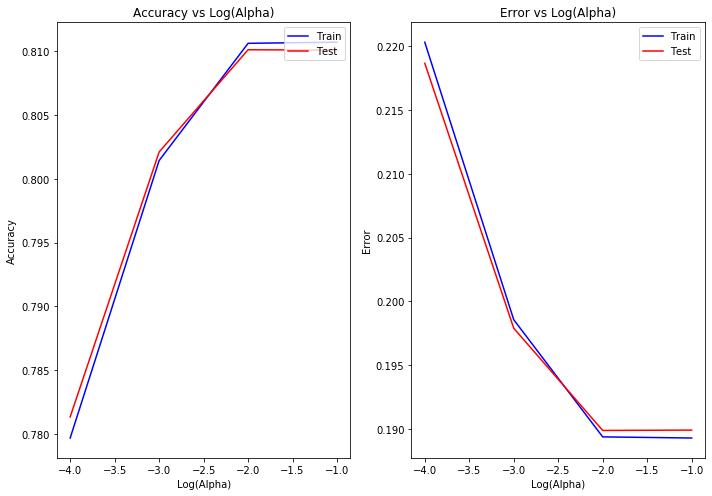

In [93]:
fig = plt.figure(figsize= (10,7))

acc_plot = fig.add_subplot(1,2,1)

acc_plot.plot(np.log10(alpha_values),alpha_train_accuracy,'-b', label='Train')
acc_plot.plot(np.log10(alpha_values),alpha_test_accuracy,'-r', label='Test')
acc_plot.legend(loc="upper right")
acc_plot.set_ylabel("Accuracy")
acc_plot.set_xlabel("Log(Alpha)")
acc_plot.set_title("Accuracy vs Log(Alpha)")


err_plot = fig.add_subplot(1,2,2)

err_plot.plot(np.log10(alpha_values),alpha_train_error,'-b', label='Train')
err_plot.plot(np.log10(alpha_values),alpha_test_error,'-r', label='Test')
err_plot.legend(loc="upper right")
err_plot.set_ylabel("Error")
err_plot.set_xlabel("Log(Alpha)")
err_plot.set_title("Error vs Log(Alpha)")

fig.tight_layout()
plt.show()

# Question 2

In [68]:
print("The best alpha is 0.1")

The best alpha is 0.1


In [105]:
theshold_val = [0.3,0.4,0.5,0.6,0.7]

thresh_test_accuracy = []
for i in range(len(theshold_val)):
    y_predicted = test(X_test, alpha_train_theta[3])

    log_df = pd.DataFrame(y_test, columns=['y_actual']) 
    log_df = pd.concat([log_df, pd.DataFrame(y_predicted)], axis=1, ignore_index=True)
    log_df.columns = ['y_actual', 'y_hat']

    log_df.loc[log_df['y_hat'] >= theshold_val[i], 'y_pred'] = 1
    log_df.loc[log_df['y_hat'] < theshold_val[i], 'y_pred'] = 0

    acc = accuracy_score(log_df['y_actual'], log_df['y_pred'])
    thresh_test_accuracy.append(acc)

In [106]:
theshold_val = [0.3,0.4,0.5,0.6, 0.7]

thresh_train_accuracy = []

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)
test_set = np.array(y_train).reshape((y_train.shape[0],1))

for i in range(len(theshold_val)):
    y_predicted = test(training_set, alpha_train_theta[3])

    log_df = pd.DataFrame(test_set, columns=['y_actual']) 
    log_df = pd.concat([log_df, pd.DataFrame(y_predicted)], axis=1, ignore_index=True)
    log_df.columns = ['y_actual', 'y_hat']

    log_df.loc[log_df['y_hat'] >= theshold_val[i], 'y_pred'] = 1
    log_df.loc[log_df['y_hat'] < theshold_val[i], 'y_pred'] = 0

    acc = accuracy_score(log_df['y_actual'], log_df['y_pred'])
    thresh_train_accuracy.append(acc)

In [107]:
thresh_test_error = np.ones(len(thresh_test_accuracy)) - thresh_test_accuracy
thresh_train_error = np.ones(len(thresh_train_accuracy)) - thresh_train_accuracy

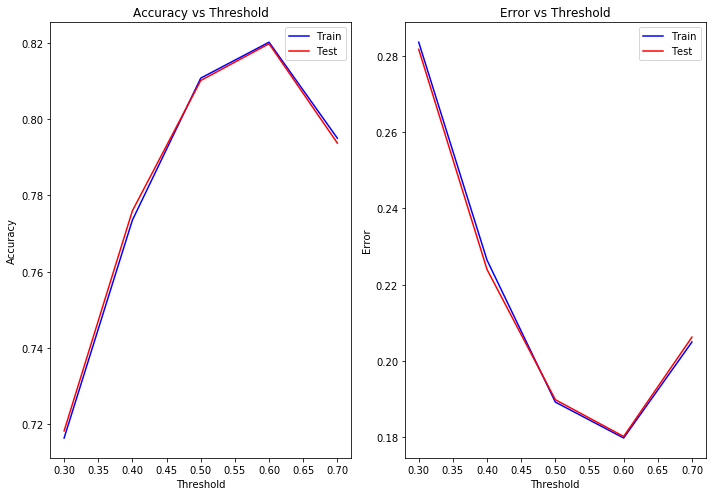

In [108]:
fig = plt.figure(figsize= (10,7))

acc_plot = fig.add_subplot(1,2,1)

acc_plot.plot(theshold_val,thresh_train_accuracy,'-b', label='Train')
acc_plot.plot(theshold_val,thresh_test_accuracy,'-r', label='Test')
acc_plot.legend(loc="upper right")
acc_plot.set_ylabel("Accuracy")
acc_plot.set_xlabel("Threshold")
acc_plot.set_title("Accuracy vs Threshold")


err_plot = fig.add_subplot(1,2,2)

err_plot.plot(theshold_val,thresh_train_error,'-b', label='Train')
err_plot.plot(theshold_val,thresh_test_error,'-r', label='Test')
err_plot.legend(loc="upper right")
err_plot.set_ylabel("Error")
err_plot.set_xlabel("Threshold")
err_plot.set_title("Error vs Threshold")

fig.tight_layout()
plt.show()

In [70]:
alpha_values = 0.1

tol_val = [10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2]

tol_train_theta = []
tol_train_cost = []

tol_test_cost = []


for i in range(len(tol_val)):
    print("\n######---- Iteration with tolerance value", tol_val[i],"-----#####")
    
    theta, trainCost, testCost = logistic_regression(X_train, y_train, 0.1, 10000, True, tol_val[i])
    
    tol_train_theta.append(theta)
    tol_train_cost.append(trainCost)
    
    tol_test_cost.append(testCost)


######---- Iteration with alpha value 1e-07 -----#####
Gradient Descent algorithm converged after 885 Iterations

######---- Iteration with alpha value 1e-06 -----#####
Gradient Descent algorithm converged after 655 Iterations

######---- Iteration with alpha value 1e-05 -----#####
Gradient Descent algorithm converged after 434 Iterations

######---- Iteration with alpha value 0.0001 -----#####
Gradient Descent algorithm converged after 234 Iterations

######---- Iteration with alpha value 0.001 -----#####
Gradient Descent algorithm converged after 81 Iterations

######---- Iteration with alpha value 0.01 -----#####
Gradient Descent algorithm converged after 6 Iterations


In [90]:
tol_test_accuracy = []
for i in range(len(tol_val)):
    y_predicted = test(X_test, tol_train_theta[i])

    log_df = pd.DataFrame(y_test, columns=['y_actual']) 
    log_df = pd.concat([log_df, pd.DataFrame(y_predicted)], axis=1, ignore_index=True)
    log_df.columns = ['y_actual', 'y_hat']

    theshold_val = 0.5
    log_df.loc[log_df['y_hat'] >= theshold_val, 'y_pred'] = 1
    log_df.loc[log_df['y_hat'] < theshold_val, 'y_pred'] = 0

    acc = accuracy_score(log_df['y_actual'], log_df['y_pred'])
    tol_test_accuracy.append(acc)

In [109]:
tol_train_accuracy = []

one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)
test_set = np.array(y_train).reshape((y_train.shape[0],1))

for i in range(len(tol_val)):
    y_predicted = test(training_set, tol_train_theta[i])

    log_df = pd.DataFrame(test_set, columns=['y_actual']) 
    log_df = pd.concat([log_df, pd.DataFrame(y_predicted)], axis=1, ignore_index=True)
    log_df.columns = ['y_actual', 'y_hat']

    theshold_val = 0.6
    log_df.loc[log_df['y_hat'] >= theshold_val, 'y_pred'] = 1
    log_df.loc[log_df['y_hat'] < theshold_val, 'y_pred'] = 0

    acc = accuracy_score(log_df['y_actual'], log_df['y_pred'])
    tol_train_accuracy.append(acc)

In [110]:
tol_test_error = np.ones(len(tol_test_accuracy)) - tol_test_accuracy
tol_train_error = np.ones(len(tol_train_accuracy)) - tol_train_accuracy

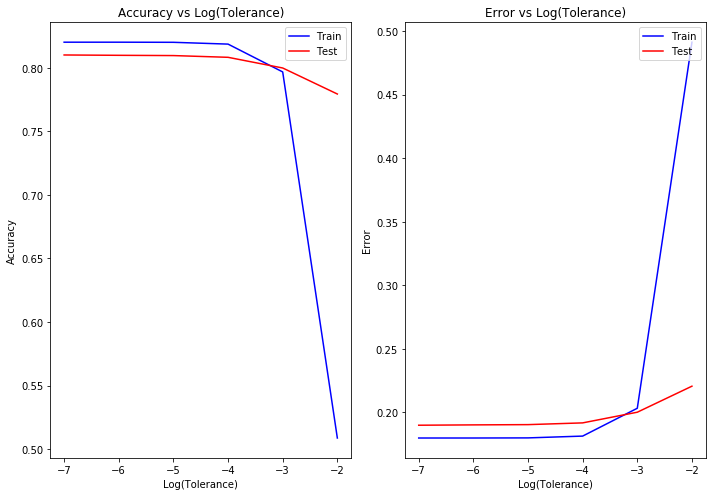

In [112]:
fig = plt.figure(figsize= (10,7))

acc_plot = fig.add_subplot(1,2,1)

acc_plot.plot(np.log10(tol_val),tol_train_accuracy,'-b', label='Train')
acc_plot.plot(np.log10(tol_val),tol_test_accuracy,'-r', label='Test')
acc_plot.legend(loc="upper right")
acc_plot.set_ylabel("Accuracy")
acc_plot.set_xlabel("Log(Tolerance)")
acc_plot.set_title("Accuracy vs Log(Tolerance)")


err_plot = fig.add_subplot(1,2,2)

err_plot.plot(np.log10(tol_val),tol_train_error,'-b', label='Train')
err_plot.plot(np.log10(tol_val),tol_test_error,'-r', label='Test')
err_plot.legend(loc="upper right")
err_plot.set_ylabel("Error")
err_plot.set_xlabel("Log(Tolerance)")
err_plot.set_title("Error vs Log(Tolerance)")

fig.tight_layout()
plt.show()

In [113]:
print("The optimal tolerance is 10^-4")

The optimal tolerance is 10^-4


# Question 3

In [130]:
import random
k = random.sample(range(0, 14), 8)


# defining feature matrix(X) and response vector(y) 
X = df.iloc[:,0:8]
y = df["run_class"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one_column, X_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

In [131]:
df.columns[k]

Index(['KWG', 'NWG', 'MDIMC', 'MDIMA', 'SA', 'KWI', 'VWN', 'NDIMC'], dtype='object')

In [132]:
print("The best alpha is 0.1")
print("The best tolerance value is 10^-4")
print("The best threshold is 0.6")

The best alpha is 0.1
The best tolerance value is 10^-4
The best threshold is 0.6


In [133]:
theta8, trainCost8, testCost8 = logistic_regression(X_train, y_train, 0.1, 10000, True, 10**-4)

Gradient Descent algorithm converged after 194 Iterations


In [134]:
y_predicted = test(X_test, theta8)

log_df = pd.DataFrame(y_test, columns=['y_actual']) 
log_df = pd.concat([log_df, pd.DataFrame(y_predicted)], axis=1, ignore_index=True)
log_df.columns = ['y_actual', 'y_hat']
theshold_val = 0.6

log_df.loc[log_df['y_hat'] >= theshold_val, 'y_pred'] = 1
log_df.loc[log_df['y_hat'] < theshold_val, 'y_pred'] = 0

acc_train8 = accuracy_score(log_df['y_actual'], log_df['y_pred'])

In [135]:
one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)
test_set = np.array(y_train).reshape((y_train.shape[0],1))

y_predicted = test(training_set, theta8)

log_df = pd.DataFrame(test_set, columns=['y_actual']) 
log_df = pd.concat([log_df, pd.DataFrame(y_predicted)], axis=1, ignore_index=True)
log_df.columns = ['y_actual', 'y_hat']

theshold_val = 0.6
log_df.loc[log_df['y_hat'] >= theshold_val, 'y_pred'] = 1
log_df.loc[log_df['y_hat'] < theshold_val, 'y_pred'] = 0

acc_test8 = accuracy_score(log_df['y_actual'], log_df['y_pred'])

In [149]:
print(acc_train8)
print(acc_test8)
print(tol_train_accuracy[3])
print(tol_train_accuracy[3])

0.8224061810154525
0.8225579470198675
0.8186672185430464
0.8186672185430464


In [137]:
tol_train_theta[3]

array([[-0.00247716,  1.11118771,  0.7001912 ,  0.09228744, -0.72096318,
        -0.60940893, -0.02931144, -0.06083945, -0.02002037,  0.01353618,
        -0.07039227, -0.27833415, -0.02785967, -0.35018893, -0.06876217]])

# Question 4

In [142]:
# defining feature matrix(X) and response vector(y) 
k  =[0,1,3,4,9, 10,12,13]

X = df.iloc[:,k]
y = df["run_class"]
  


# splitting X and y into training and testing sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=1) 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)
one_column = np.ones((X_test.shape[0],1))
X_test = np.concatenate((one_column, X_test), axis = 1)

y_test = np.array(y_test).reshape((y_test.shape[0],1))

In [143]:
df.columns[k]

Index(['MWG', 'NWG', 'MDIMC', 'NDIMC', 'VWN', 'STRM', 'SA', 'SB'], dtype='object')

In [144]:
theta_best, trainCost_best, testCost_best = logistic_regression(X_train, y_train, 0.1, 10000, True, 10**-4)

Gradient Descent algorithm converged after 214 Iterations


In [145]:
y_predicted = test(X_test, theta_best)

log_df = pd.DataFrame(y_test, columns=['y_actual']) 
log_df = pd.concat([log_df, pd.DataFrame(y_predicted)], axis=1, ignore_index=True)
log_df.columns = ['y_actual', 'y_hat']
theshold_val = 0.6

log_df.loc[log_df['y_hat'] >= theshold_val, 'y_pred'] = 1
log_df.loc[log_df['y_hat'] < theshold_val, 'y_pred'] = 0

acc_train_best = accuracy_score(log_df['y_actual'], log_df['y_pred'])

In [146]:
one_column = np.ones((X_train.shape[0],1))
training_set = np.concatenate((one_column, X_train), axis = 1)
test_set = np.array(y_train).reshape((y_train.shape[0],1))

y_predicted = test(training_set, theta_best)

log_df = pd.DataFrame(test_set, columns=['y_actual']) 
log_df = pd.concat([log_df, pd.DataFrame(y_predicted)], axis=1, ignore_index=True)
log_df.columns = ['y_actual', 'y_hat']

theshold_val = 0.6
log_df.loc[log_df['y_hat'] >= theshold_val, 'y_pred'] = 1
log_df.loc[log_df['y_hat'] < theshold_val, 'y_pred'] = 0

acc_test_best = accuracy_score(log_df['y_actual'], log_df['y_pred'])

In [147]:
print(acc_train_best)
print(acc_test_best)

0.8172047461368653
0.8195364238410596


# Logistic Regression using sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

predicted_classes = model.predict(X_test)
accuracy = accuracy_score(y_test,predicted_classes)
parameters = model.coef_

In [ ]:
accuracy